<a href="https://colab.research.google.com/github/Deepanshu99589/COLAB/blob/main/Program_in_python_to_predict_if_a_loan_will_get_approved_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT PACKAGES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**READ AND VISUALIZE THE DATA**

In [ ]:
df= pd.read_csv('Loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**DATA ANALYSIS**

In [ ]:
df.shape

(367, 12)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**ENCODING**

In [ ]:
#Loan status Encoding
df= df.replace({"Loan_Status":{'Y': 1, 'N': 0}})

#Gender Encoding
df= df.replace({"Gender":{"Male": 1, "Female": 0}})

#Married Encoding
df= df.replace({"Married":{"Yes": 1, "No": 0}})

#Replace the 3+ in dependents and make the column numeric
df['Dependents'] = df['Dependents'].replace('3+' '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

#Count the quantity of values on the column
df['Self_Employed'].value_counts()
df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
df['Education'].value_counts()
df= df.replace({"Education":{"Graduate":1, "Not Graduate":0}})

#Drop the Loan ID column
df = df.drop('Loan_ID',axis=1)

#Property Area Encoding
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].map({'Rural':0, 'Urban':1, 'Semiurban':2})

print(df)


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0        1         0.0          1            0.0             5720   
1       1.0        1         1.0          1            0.0             3076   
2       1.0        1         2.0          1            0.0             5000   
3       1.0        1         2.0          1            0.0             2340   
4       1.0        0         0.0          0            0.0             3276   
..      ...      ...         ...        ...            ...              ...   
362     1.0        1         NaN          0            1.0             4009   
363     1.0        1         0.0          1            0.0             4158   
364     1.0        0         0.0          1            0.0             3250   
365     1.0        1         0.0          1            0.0             5000   
366     1.0        0         0.0          1            1.0             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,356.000000,367.000000,317.000000,367.000000,344.000000,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
mean,0.803371,0.634877,0.555205,0.771117,0.107558,4805.599455,1569.577657,136.132597,342.537396,0.825444,1.013624
std,0.398009,0.482122,0.788132,0.420687,0.310273,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.787421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,1
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,1
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,1
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,1
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,NaN,0,1.0,4009,1777,113.0,360.0,1.0,1
363,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,1
364,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,NaN,2
365,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,0


In [ ]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

**GRAPHICAL REPRESENTATION**

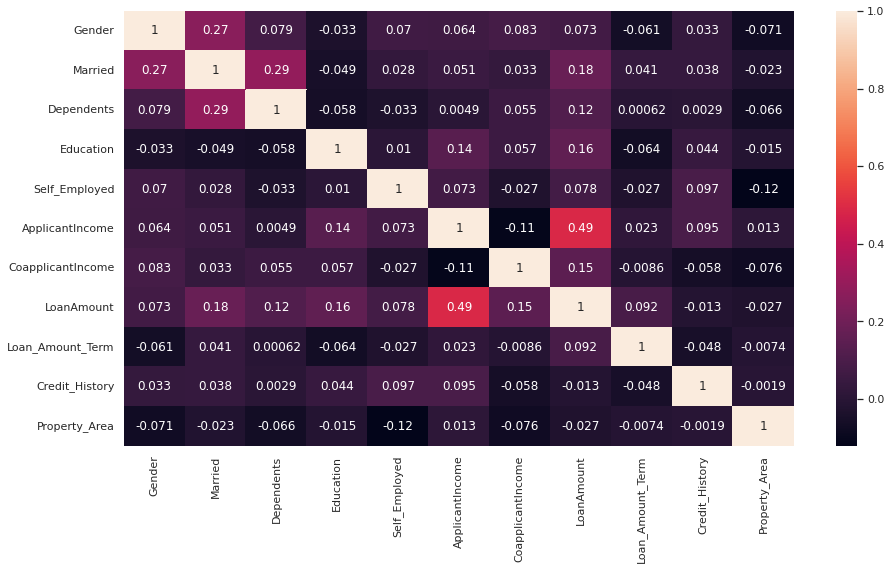

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,cmap="rocket")
plt.show()

**CORRELATION**

In [ ]:
def correlationdrop(df, sl):
    columns = df.columns
    for column in columns:
       C=abs(df[column].corr(df['Loan_Status']))
       if C < sl:
          df=df.drop(columns=[column])
          return df
          df= correlationdrop(df,0.05)
          print(df)

**SEPERATE THE VARIABLES**

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

**SCALE THE DATA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)

**SPLIT THE DATA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**LOGISTIC REGRESSION AND ACCURACY**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
z=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,z)

0.35135135135135137